In [1]:
import pandas as pd
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
from sklearn.ensemble import GradientBoostingRegressor


/home/tomasz/.local/share/virtualenvs/house_prices-51WImSaM/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
df_train = pd.read_csv('data/train.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
cols =['LotArea', 'Neighborhood','YearBuilt','OverallQual']

In [5]:
df_train[cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
LotArea         1460 non-null int64
Neighborhood    1460 non-null object
YearBuilt       1460 non-null int64
OverallQual     1460 non-null int64
dtypes: int64(3), object(1)
memory usage: 45.7+ KB


In [8]:
pd.factorize(X['Neighborhood'])[0]

array([ 0,  1,  0, ...,  2, 11, 15])

/home/tomasz/.local/share/virtualenvs/house_prices-51WImSaM/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


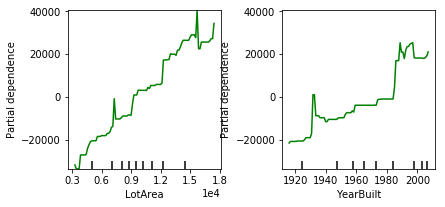

In [13]:
my_model = GradientBoostingRegressor()
X = df_train[cols]
X['Neighborhood_cat'] = pd.factorize(X['Neighborhood'])[0]
numeric_cols = X.select_dtypes(exclude=object).columns
X_final = X[numeric_cols]
y = df_train.SalePrice
my_model.fit(X_final, y)
my_plots = plot_partial_dependence(my_model, features=[0,1],X=X_final,feature_names=['LotArea','YearBuilt'])

In [12]:
X_final.head()

,LotArea,YearBuilt,OverallQual,Neighborhood_cat
0,8450,2003,7,0
1,9600,1976,6,1
2,11250,2001,7,0
3,9550,1915,7,2
4,14260,2000,8,3
